# TRABAJO UNIDAD 2. Espacios de color. Javier Lópe Martínez

# 1. Introducción

En el siguiente cuaderno Jupyter se desarrolla la tarea de la unidad 2 de sistemas de percepción en robótica. La primera parte se corresponde con con la definición de librerias, la ruta para las imágenes, y una función general para que los nuevos valores que introduzcamos en los pixeles se encuentren en el intervalo [0 255]

A continuación, se definen los modelos de color con los que se trabajará. Cabe mencionar de que se definen a modo de función para que seá más intuitivo modificar los valores y así obtener gráficos rápidamente.

# 2.1 Definiciones generales e importación de librerias



In [1]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

path = Path('imagenes')
def clip(x):
    return np.clip(x,0,255).astype(np.uint8)


 Se trabajara con la libreria opencv, la cual trabaja como base en BGR, y las conversiones se realizarán desde ese espacio de color

# 2.2 RGB


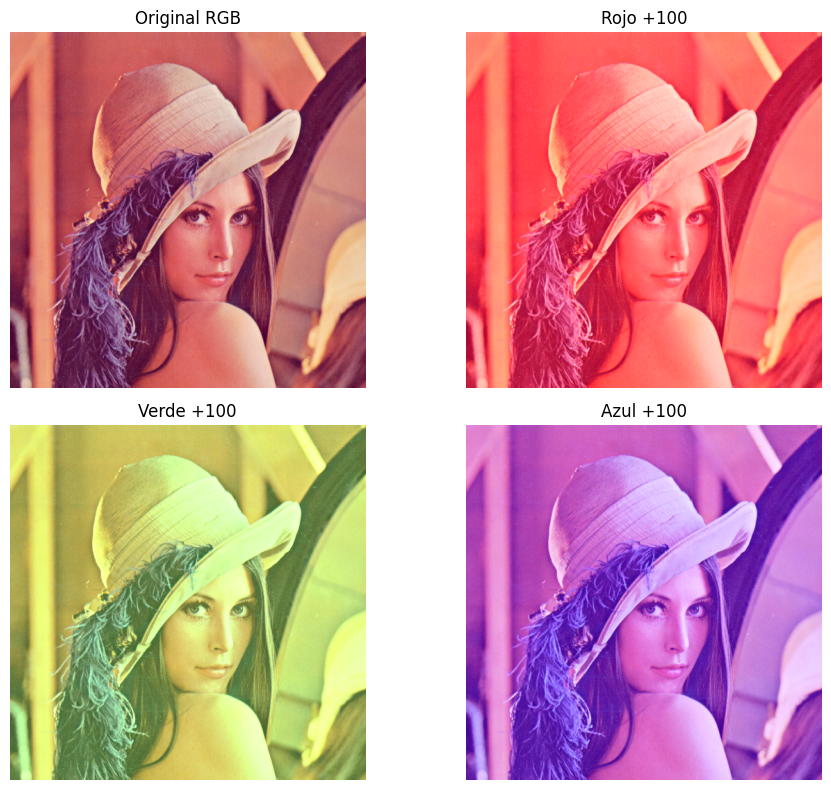

In [22]:
#Se carga la imágen

img1 = cv2.imread(str(path/'lena_color.tiff'))

#Se define una función para modificar los canales RGB
def bgr2rgb(Rin, Gin, Bin):
    RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    R, G, B = cv2.split(RGB)
    Rmod = clip(R.astype(np.int16) + Rin)
    Gmod = clip(G.astype(np.int16) + Gin)
    Bmod = clip(B.astype(np.int16) + Bin)
    RGBmod = cv2.merge([Rmod, Gmod, Bmod])
    return RGBmod

#Definición de las imagenes en RGB

rgb0 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
rgb1 = bgr2rgb(100,0,0) #Se aumenta canal R
rgb2 = bgr2rgb(0,100,0) #Se aumenta canal G
rgb3 = bgr2rgb(0,0,100) #Se aumenta canal B

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Imagen original
axes[0,0].imshow(rgb0)
axes[0,0].set_title("Original RGB")
axes[0,0].axis("off")

# Imagen con más rojo
axes[0,1].imshow(rgb1)
axes[0,1].set_title("Rojo +100")
axes[0,1].axis("off")

# Imagen con más verde
axes[1,0].imshow(rgb2)
axes[1,0].set_title("Verde +100")
axes[1,0].axis("off")

# Imagen con más azul
axes[1,1].imshow(rgb3)
axes[1,1].set_title("Azul +100")
axes[1,1].axis("off")

plt.tight_layout()
plt.show()

# 2.3 HSV

HSV tiene **3 canales**, H, S y V. **H** es el HUE, y al ser este un modelo de color en coordenadas cilíndricas, el valor va en el intervalo de **[0 180]**, y dependiendo de en que franja nos encontremos existirá un color u otro. Los canales **S** y **V**, son la saturación y brillo respectivamente, toman valores de [0 255]. Cuanto **menor Saturación**, más cercano al blanco, **cuanto menor Valor**, más cercano al negro.

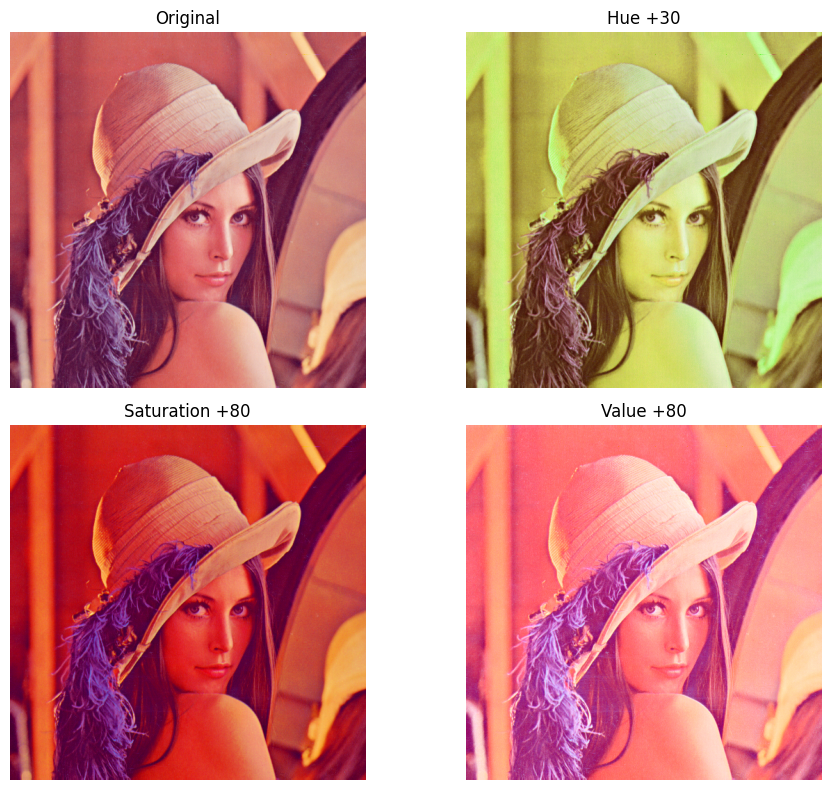

In [ ]:
img2 = cv2.imread(str(path/'lena_color.tiff'))
def bgr2hsv(Hin, Sin, Vin):
    HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(HSV)
    Hmod = (H + Hin) % 180
    Smod = clip(S.astype(np.int16) + Sin)
    Vmod = clip(V.astype(np.int16) + Vin)
    HSVmod = cv2.merge([Hmod, Smod, Vmod])
    hsv_rgb = cv2.cvtColor(HSVmod.astype(np.uint8), cv2.COLOR_HSV2RGB)
    return hsv_rgb

rgb_hsv0 = bgr2hsv(0,0,0)  # Original en RGB
rgb_hsv1 = bgr2hsv(30, 0, 0)   # Gira el tono
rgb_hsv2 = bgr2hsv(0, 80, 0)   # Aumenta saturación
rgb_hsv3 = bgr2hsv(0, 0, 80)   # Aumenta brillo

# Mostrar con matplotlib


fig, axes = plt.subplots(2, 2, figsize=(10, 8))


axes[0,0].imshow(rgb_hsv0); axes[0,0].set_title("Original"); axes[0,0].axis("off")
axes[0,1].imshow(rgb_hsv1); axes[0,1].set_title("Hue +30"); axes[0,1].axis("off")
axes[1,0].imshow(rgb_hsv2); axes[1,0].set_title("Saturation +80"); axes[1,0].axis("off")
axes[1,1].imshow(rgb_hsv3); axes[1,1].set_title("Value +80"); axes[1,1].axis("off")

plt.tight_layout()
plt.show()

Como se puede apreciar, la imagen original tiene de por sí un HUE rojizo, es decir se encuentra en el intervalo de [170 a 180] o [0 a 10] aproximadamente. Al aumentar el HUE en 30, la imagen pasaría a verse de un color amarillo ya que se encuentra aproximadamente en el intervalo [20 35] aproximadamente. Al aumentar la saturación, mas alejado del blanco se encontrara el color, es por ello que se presencia un color más oscuro. Para el caso contrario, al aumentar el Valor, mas alejado del negro estará la imagén y es por ello que se aprecia un tono más blanco.

# 2.4 LAB

Existen tres canales **L**, luminosidad, **a** color del verde hacia el rojo, **b** color del azul hacia el verde. En teoría el canal **L** se mide en porcentaje, pero en opencv va del rango de [0 255], **a** y **b** si van de [0 255]  

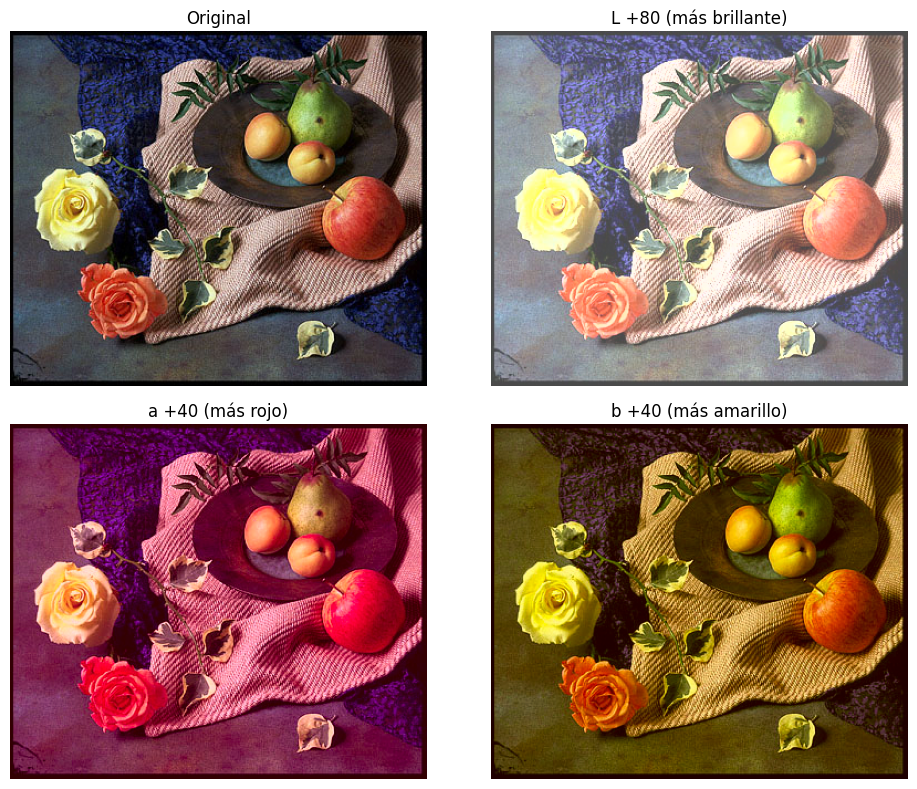

In [9]:
img3 = cv2.imread(str(path/'fruit.jpg'))
def bgr2lab(l_in, a_in, b_in):
    LAB = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(LAB)
    lmod = clip(l.astype(np.int16) + l_in)
    amod = clip(a.astype(np.int16) + a_in)
    bmod = clip(b.astype(np.int16) + b_in)
    labmod = cv2.merge([lmod, amod, bmod])
    lab_rgb = cv2.cvtColor(labmod.astype(np.uint8), cv2.COLOR_Lab2RGB)
    return lab_rgb

# Imagen original en RGB
rgb_lab0 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Modificaciones en Lab
rgb_lab1 = bgr2lab(80, 0, 0)   # Más luminosidad
rgb_lab2 = bgr2lab(0, 40, 0)   # Más hacia rojo
rgb_lab3 = bgr2lab(0, 0, 40)   # Más hacia amarillo

# Subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].imshow(rgb_lab0);axes[0,0].set_title("Original");axes[0,0].axis("off")
axes[0,1].imshow(rgb_lab1);axes[0,1].set_title("L +80 (más brillante)");axes[0,1].axis("off")
axes[1,0].imshow(rgb_lab2);axes[1,0].set_title("a +40 (más rojo)");axes[1,0].axis("off")
axes[1,1].imshow(rgb_lab3);axes[1,1].set_title("b +40 (más amarillo)");axes[1,1].axis("off")

plt.tight_layout()
plt.show()



En la imagen, al aumentar **L** aumenta la luminosidad de la imagen, es decir se ve más "blanca".
<div style="text-align:center"><img src="imagenes/image.png" width="35%"/></div>

Atendiendo a la imagen de arriba, de izquierda a derecha se aumenta **L**. El resultado de tener una imagen hacia el rojo cuando aumentamos **a** es porque el valor original de **b** ya es alto, y al aumentar **a** tiende al rojizo. Al aumentar **b** la imagen tiende hacia el amarillo, eso es debido a que el valor de **a** original es un valor intermedio y al aumentar **b** tiende hacia este color. Si se disminuye **a** y se incrementa **b** el color sería más verdoso

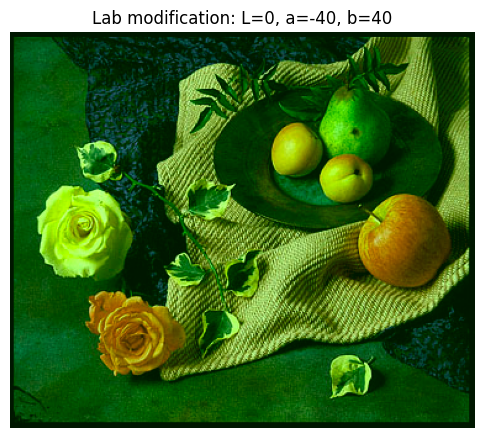

In [10]:
rgb_lab4 = bgr2lab(0, -40, 40)
plt.figure(figsize=(6,6))
plt.imshow(rgb_lab4)
plt.title("Lab modification: L=0, a=-40, b=40")
plt.axis("off")
plt.show()

# 2.5 YCbCr


Los canales son **Y**, **Cb** y **Cr**. **Y** contiene la información de la luminancia, mientras que **Cb** y **Cr** tienen la información cromática, **Cb** para el azul y **Cr** para el rojo.

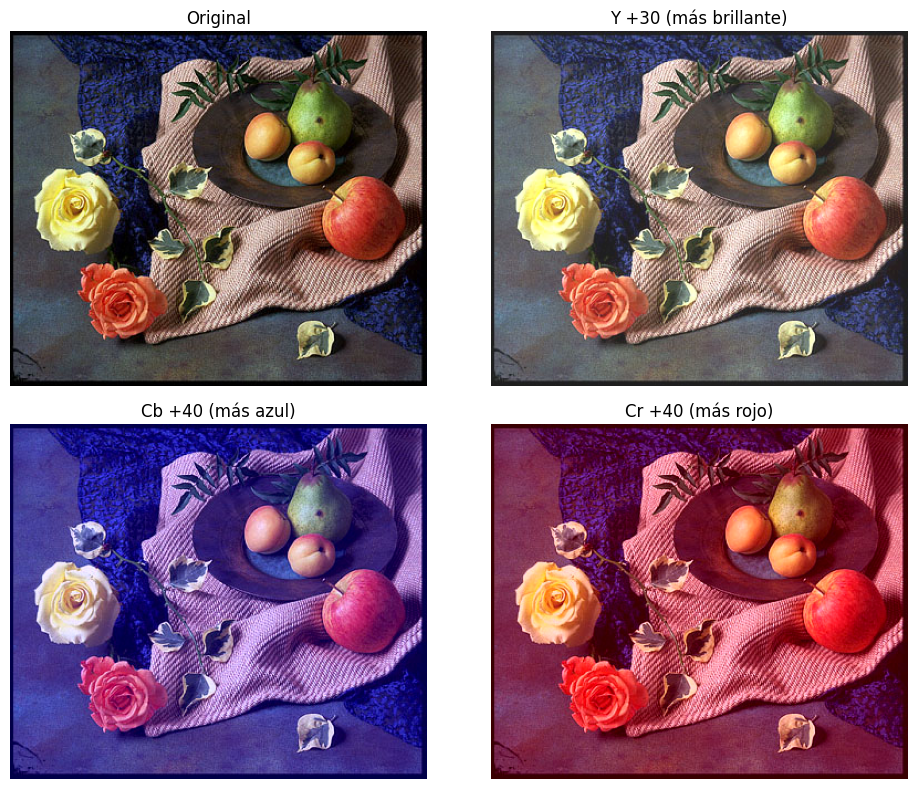

In [13]:
img4 = cv2.imread(str(path/'fruit.jpg'))
def bgr2ycbcr(Yin, cbin, crin):
    ycbcr = cv2.cvtColor(img4, cv2.COLOR_BGR2YCR_CB)
    Y, cr, cb = cv2.split(ycbcr)
    Ymod = clip(Y.astype(np.int16) + Yin)
    cbmod = clip(cb.astype(np.int16) + cbin)
    crmod = clip(cr.astype(np.int16) + crin)
    ycbcrmod = cv2.merge([Ymod, crmod, cbmod])
    ycbcr_rgb = cv2.cvtColor(ycbcrmod.astype(np.uint8), cv2.COLOR_YCR_CB2RGB)
    return ycbcr_rgb

# Imagen original en RGB
rgb_ycbcr0 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Modificaciones YCbCr
rgb_ycbcr1 = bgr2ycbcr(30, 0, 0)    # Aumenta luminancia
rgb_ycbcr2 = bgr2ycbcr(0, 40, 0)    # Aumenta componente azul
rgb_ycbcr3 = bgr2ycbcr(0, 0, 40)    # Aumenta componente rojo

# Subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].imshow(rgb_ycbcr0);axes[0,0].set_title("Original");axes[0,0].axis("off")
axes[0,1].imshow(rgb_ycbcr1);axes[0,1].set_title("Y +30 (más brillante)");axes[0,1].axis("off")
axes[1,0].imshow(rgb_ycbcr2);axes[1,0].set_title("Cb +40 (más azul)");axes[1,0].axis("off")
axes[1,1].imshow(rgb_ycbcr3);axes[1,1].set_title("Cr +40 (más rojo)");axes[1,1].axis("off")

plt.tight_layout()
plt.show()




Como se puede observar aumentar **Y** aumenta la luminosidad de la luz, un aumento en **Cb** produce un aumento en los azules, mientras que un aumento en **Cr** intensifica el rojo. 

# 2.6 XYZ

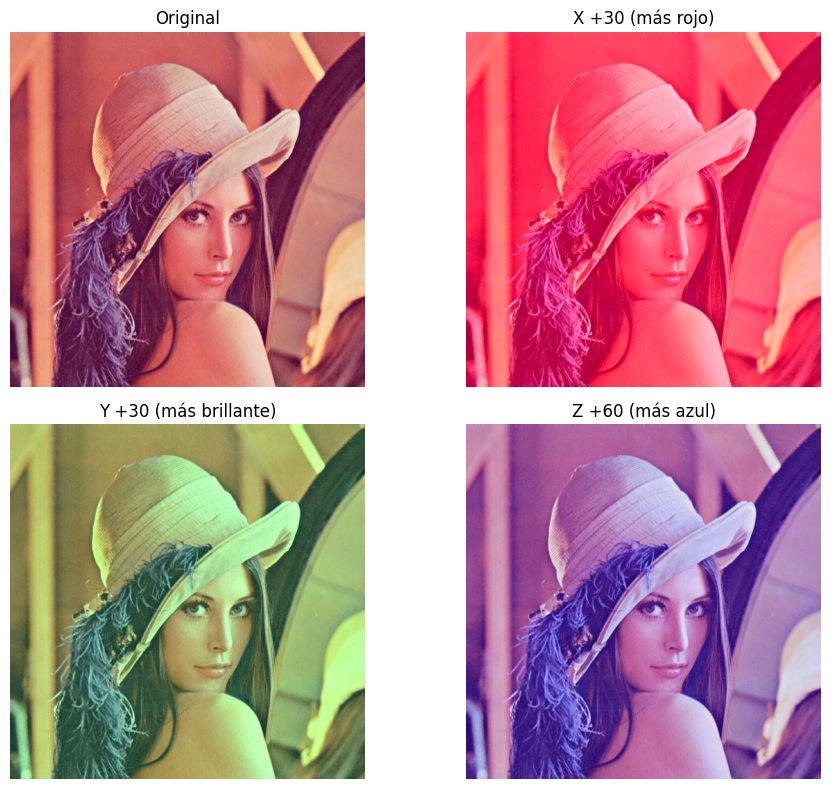

In [20]:
img5 = cv2.imread(str(path/'lena_color.tiff'))
def bgr2xyz(xin, yin, zin):
    xyz = cv2.cvtColor(img5, cv2.COLOR_BGR2XYZ)
    x, y, z = cv2.split(xyz)
    xmod = clip(x.astype(np.int16) + xin)
    ymod = clip(y.astype(np.int16) + yin)
    zmod = clip(z.astype(np.int16) + zin)
    xyzmod = cv2.merge([xmod, ymod, zmod])
    xyz_rgb = cv2.cvtColor(xyzmod.astype(np.uint8), cv2.COLOR_XYZ2RGB)
    return xyz_rgb

# Imagen original en RGB
rgb0 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Modificaciones XYZ
rgb1 = bgr2xyz(30, 0, 0)   # Aumenta X (rojo-verde)
rgb2 = bgr2xyz(0, 30, 0)   # Aumenta Y (luminancia)
rgb3 = bgr2xyz(0, 0, 60)   # Aumenta Z (más azul)

# Subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].imshow(rgb0);axes[0,0].set_title("Original");axes[0,0].axis("off")
axes[0,1].imshow(rgb1);axes[0,1].set_title("X +30 (más rojo)");axes[0,1].axis("off")
axes[1,0].imshow(rgb2);axes[1,0].set_title("Y +30 (más brillante)");axes[1,0].axis("off")
axes[1,1].imshow(rgb3);axes[1,1].set_title("Z +60 (más azul)");axes[1,1].axis("off")

plt.tight_layout()
plt.show()

Al aumentar en **X** la imagén tiende hacia el rojo, en caso de que se disminuya, la imágen tenderá hacia el verde. Al aumentar **Z** va hacia el azul.

# 2.7 Escala de Grises


In [ ]:
img6 = cv2.imread()